ev_model modules loaded


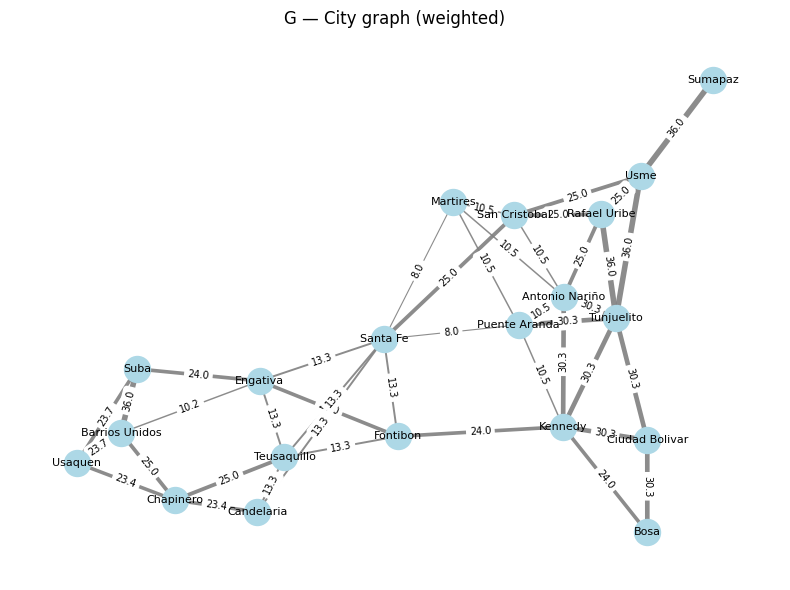

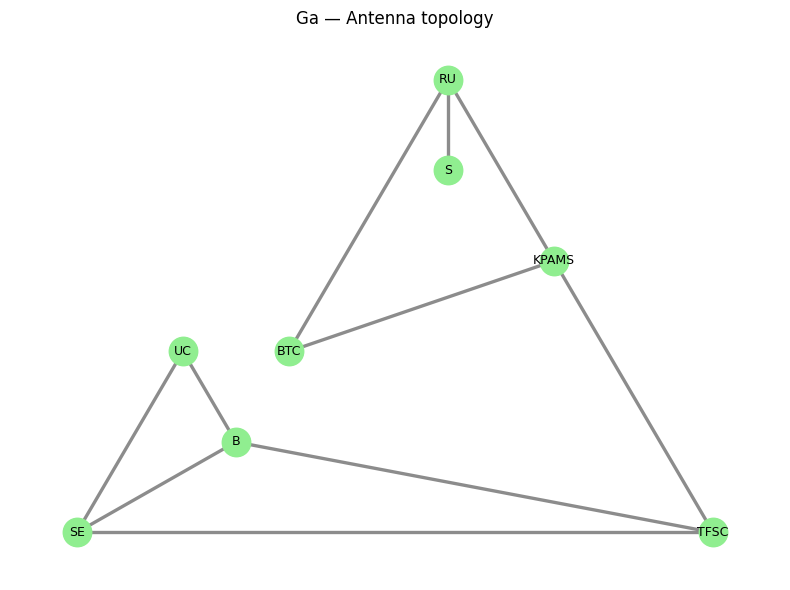

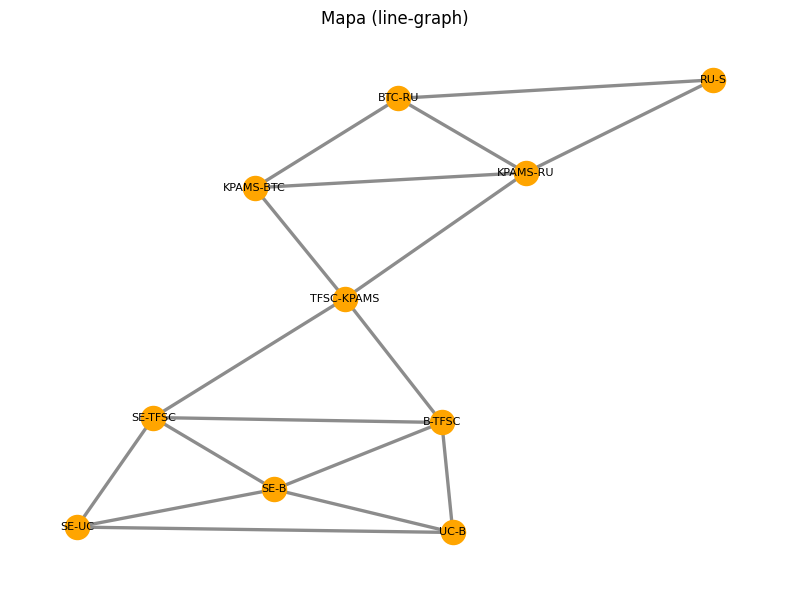

In [8]:
from ev_model import graphs, simulation, utils, entities, viz
import networkx as nx
import matplotlib.pyplot as plt

print('ev_model modules loaded')
# --- Parameters ---
# You can edit the following lists to change the graphs used by the notebook.

NODES = [
    'Suba', 'Usaquen', 'Chapinero', 'Candelaria', 'Barrios Unidos',
    'Engativa', 'Fontibon', 'Teusaquillo', 'Martires', 'Santa Fe',
    'Usme', 'San Cristobal', 'Antonio Nariño', 'Puente Aranda',
    'Kennedy', 'Bosa', 'Rafael Uribe', 'Tunjuelito', 'Ciudad Bolivar',
    'Sumapaz'
]
# edges: tuples (u, v, weight)
EDGES = [
    ('Suba', 'Usaquen', 23.7), # autonorte
    ('Barrios Unidos', 'Usaquen', 23.7), # autonorte
    ('Usaquen', 'Chapinero', 23.4), # 7ma
    ('Chapinero', 'Candelaria', 23.4), # 7ma
    ('Chapinero', 'Barrios Unidos', 25), # Caracas
    ('Chapinero', 'Teusaquillo', 25), # Caracas
    ('Santa Fe', 'San Cristobal', 25), # Caracas
    ('San Cristobal', 'Rafael Uribe', 25), # Caracas
    ('San Cristobal', 'Usme', 25), # Caracas
    ('Usme', 'Rafael Uribe', 25), # Caracas
    ('Antonio Nariño', 'Rafael Uribe', 25), # Caracas
    ('Santa Fe', 'Martires', 8), # Americas
    ('Santa Fe', 'Puente Aranda', 8), # Americas
    ('Engativa', 'Barrios Unidos', 10.2), # ac 80
    ('Engativa', 'Teusaquillo', 13.3), # ac 26
    ('Candelaria', 'Teusaquillo', 13.3), # ac 26
    ('Santa Fe', 'Teusaquillo', 13.3), # ac 26
    ('Candelaria', 'Santa Fe', 13.3), # ac 26
    ('Engativa', 'Santa Fe', 13.3), # ac 26
    ('Fontibon', 'Santa Fe', 13.3), # ac 26
    ('Fontibon', 'Teusaquillo', 13.3), # ac 26
    ('Suba', 'Barrios Unidos', 36), # av Boyaca
    ('Usme', 'Sumapaz', 36), # av Boyaca
    ('Rafael Uribe', 'Tunjuelito', 36), # av Boyaca
    ('Usme', 'Tunjuelito', 36), # av Boyoca
    ('Suba', 'Engativa', 24), # av cali
    ('Fontibon', 'Engativa', 24), # av cali
    ('Fontibon', 'Kennedy', 24), # av cali
    ('Kennedy', 'Bosa', 24), # av cali
    ('Puente Aranda', 'Kennedy', 10.5), # av 1ra de mayo
    ('Puente Aranda', 'Antonio Nariño', 10.5), # av 1ra de mayo
    ('Puente Aranda', 'Martires', 10.5), # av 1ra de mayo
    ('Antonio Nariño', 'San Cristobal', 10.5), # av 1ra de mayo
    ('Martires', 'San Cristobal', 10.5), # av 1ra de mayo
    ('Martires', 'Antonio Nariño', 10.5), # av 1ra de mayo
    ('Kennedy', 'Tunjuelito', 30.3), # autosur
    ('Kennedy', 'Ciudad Bolivar', 30.3), # autosur
    ('Bosa', 'Ciudad Bolivar', 30.3), # autosur
    ('Tunjuelito', 'Ciudad Bolivar', 30.3), # autosur
    ('Tunjuelito', 'Antonio Nariño', 30.3), # autosur
    ('Tunjuelito', 'Puente Aranda', 30.3), # autosur
    ('Kennedy', 'Antonio Nariño', 30.3) # autosur
]
# Build G from the notebook-specified lists
G = nx.Graph()
G.add_nodes_from(NODES)
G.add_weighted_edges_from(EDGES)

# Aggregated graph (Ga) parameters - also editable in the notebook
GA_NODES = ['SE','UC','B','TFSC','KPAMS','BTC','RU','S']
GA_EDGES = [('SE','TFSC'),('SE','UC'),('TFSC','KPAMS'),('KPAMS','BTC'),('KPAMS','RU'),('BTC','RU'),('RU','S'),('B','SE'),('B','TFSC'),('B','UC')]
GA_DEFAULT_WEIGHT = 1.0
Ga = nx.Graph()
Ga.add_nodes_from(GA_NODES)
Ga.add_edges_from(GA_EDGES)
for u,v in Ga.edges():
    Ga[u][v]['weight'] = GA_DEFAULT_WEIGHT

mapa = graphs.build_mapa(Ga)

viz.draw_graph(G, layout='spring', show_edge_weights=True, weight_attr='weight', scale_width=(0.8, 4.0),
               node_color='lightblue', node_size=350, font_size=8, seed=42, title='G — City graph (weighted)')

viz.draw_graph(Ga, layout='planar', show_edge_weights=False, node_color='lightgreen', node_size=420,
               font_size=9, seed=24, title='Ga — Antenna topology')

# Optionally: visualize the mapa (line-graph) if available
if 'mapa' in globals():
    try:
        from ev_model import viz
    except Exception as e:
        print("Could not import ev_model.viz:", e)
    else:
        viz.draw_graph(mapa, layout='spring', node_color='orange', node_size=300, title='Mapa (line-graph)')

Flota size: 12 — estaciones: 8


,placa,ubicacion,bateria,route,route_len
0,car0,Martires,53,"[Martires, Puente Aranda, Santa Fe, Engativa, ...",4
1,car1,Puente Aranda,55,"[Puente Aranda, Santa Fe, Teusaquillo, Engativ...",6
2,car2,Candelaria,67,"[Candelaria, Santa Fe, Martires, Puente Aranda...",9
3,car3,Antonio Nariño,52,"[Antonio Nariño, Martires, San Cristobal, Sant...",9
4,car4,Tunjuelito,84,"[Tunjuelito, Ciudad Bolivar, Kennedy, Antonio ...",9
5,car5,Usme,71,"[Usme, Rafael Uribe, Tunjuelito, Kennedy, Puen...",13
6,car6,Engativa,53,"[Engativa, Santa Fe, Puente Aranda, Martires, ...",8
7,car7,Usme,58,"[Usme, San Cristobal, Martires, Santa Fe, Teus...",6
8,car8,Usme,85,"[Usme, Tunjuelito, Kennedy, Fontibon, Engativa...",15
9,car9,Teusaquillo,94,"[Teusaquillo, Candelaria, Santa Fe, San Cristo...",10


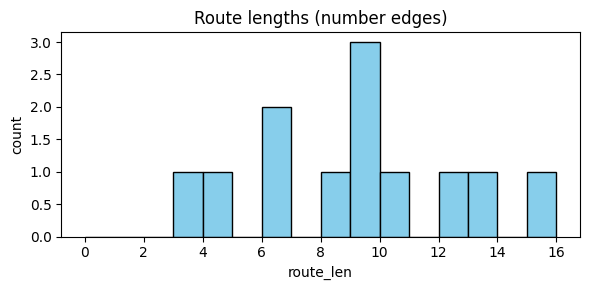

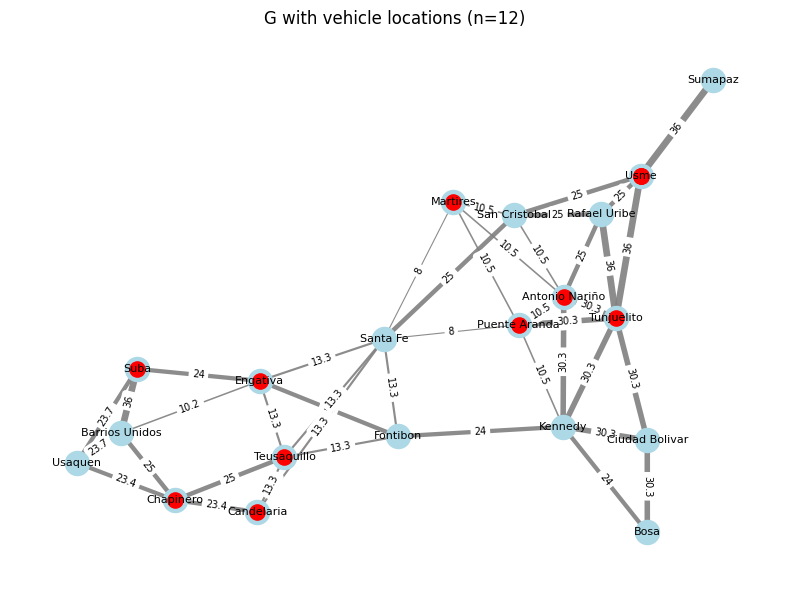

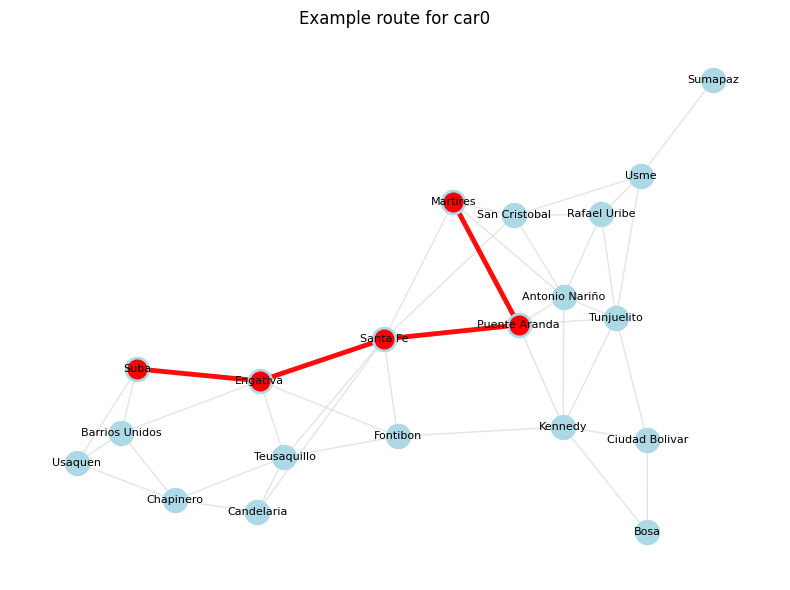

In [9]:
# --- Simulation: run example and summarize results (editable parameters)
from ev_model import simulation, viz
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Parameters: change n and seed as needed
n = 12
seed = 123

# Run the example simulation (pass the notebook-built graphs G and Ga)
res = simulation.run_example(n=n, G=G, Ga=Ga, random_seed=seed)
routes = res.get('routes', [])
df = pd.DataFrame(routes)

# Print summary counts using the dict keys (avoid NameError)
print(f"Flota size: {len(res['flota'].total) if res.get('flota') else 0} — estaciones: {len(res['estaciones'].total) if res.get('estaciones') else 0}")
display(df)

# Histogram of route lengths (safely handle empty/NaN values)
if not df.empty:
    max_len = int(df['route_len'].max()) if df['route_len'].notna().any() else 0
    plt.figure(figsize=(6,3))
    plt.hist(df['route_len'].fillna(0), bins=range(0, max_len+2), color='skyblue', edgecolor='k')
    plt.title('Route lengths (number edges)')
    plt.xlabel('route_len')
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()

# Draw G and overlay vehicle locations
G = res['G']
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8,6))
# draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=300)
nx.draw_networkx_labels(G, pos, font_size=8)
# edges with widths scaled by weight
edge_list = list(G.edges())
weights = [G[u][v].get('weight', 1.0) for u,v in edge_list]
if weights:
    mn, mx = min(weights), max(weights)
    if mx == mn:
        widths = [2.5 for _ in weights]
    else:
        widths = [0.8 + 4.0 * ((w-mn)/(mx-mn)) for w in weights]
else:
    widths = 1.5
nx.draw_networkx_edges(G, pos, width=widths, edge_color='gray', alpha=0.9)
# optionally edge labels (use the literal 'weight' key)
edge_labels = { (u,v): f"{G[u][v].get('weight', '')}" for u,v in edge_list }
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
# overlay vehicles as red nodes
vehicle_nodes = [r['ubicacion'] for r in routes if r.get('ubicacion') is not None]
if vehicle_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=vehicle_nodes, node_size=120, node_color='red')
plt.title(f'G with vehicle locations (n={n})')
plt.axis('off')
plt.tight_layout()
plt.show()

# --- Example route visualization: draw the first vehicle's candidate route if available
try:
    if routes:
        first = routes[0]
        sample_route = first.get('route')
        if sample_route and len(sample_route) > 1:
            viz.draw_route(G, sample_route, pos=pos, title=f"Example route for {first.get('placa', 'vehicle')}", show_edge_weights=False)
except Exception as e:
    print('Could not draw sample route:', e)

In [10]:
from ev_model.entities import Auto
# build or reuse your existing 'flota' and 'estaciones' objects from the notebook
# example: take first vehicle of flota
vehicle = res['flota'].total[0]

# AOC route (random-walk candidate search)
aoc_route = vehicle.AOC(10, res['estaciones'], G=res['G'])
print("AOC route:", aoc_route)

# Dijkstra route and time
route, elapsed = vehicle.route_dijkstra(res['estaciones'], G=res['G'], measure_time=True)
print("Dijkstra route:", route)
print(f"Dijkstra elapsed: {elapsed:.6f} s")

AOC route: ['Martires', 'Santa Fe', 'Puente Aranda', 'Kennedy', 'Tunjuelito', 'Usme', 'San Cristobal', 'Rafael Uribe', 'Antonio Nariño']
Dijkstra route: ['Martires', 'Santa Fe', 'Engativa', 'Suba']
Dijkstra elapsed: 0.000947 s
